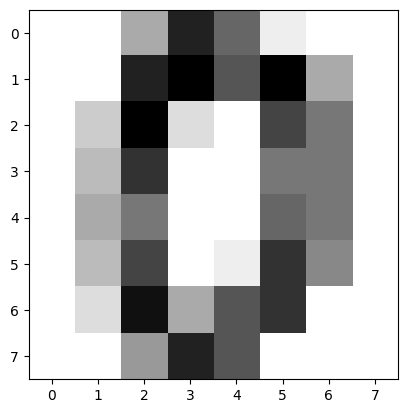

In [3]:
import numpy as np 
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
from sklearn.pipeline import Pipeline
plt.imshow(digits.images[0], cmap= plt.cm.gray_r)
plt.show()

In [6]:
X = digits.data
y = digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, stratify=y
)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = Pipeline([
        ("std", StandardScaler()),
        ("log_reg", LogisticRegression(
            solver="lbfgs",
            max_iter = 5000,
        ))
    ])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

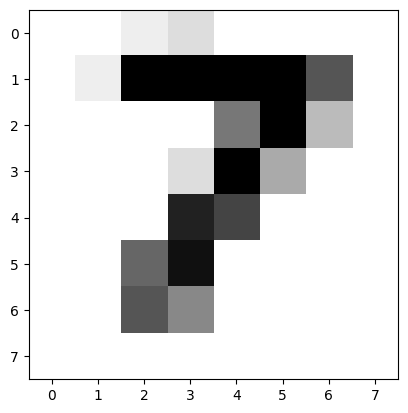

array([7])

In [7]:
from PIL import Image
def Photo(i):
    img = Image.open(f"img/{i}.png").convert("L")
    img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)
    arr = np.array(img_resized)
    arr = arr - 255
    arr = (arr / 16).astype(int)
    plt.imshow(arr, cmap=plt.cm.gray_r)
    plt.show()
    arr = arr.reshape(1,64)
    return arr

index = 107
ph_arr = Photo(index)
model.predict(ph_arr)